# Week 3 Code Explanation



# Importing Libraries and Data:
This block imports the required libraries (presumably pandas and networkx) and reads the edge and node data from CSV files (edges.csv and nodes.csv).


In [9]:
#IMPORTING DATABASE

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


edges_filename = "./edges.csv"
nodes_filename = "./nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)


# Creating a Graph:
This block uses the NetworkX library to create a graph (G) from the edge list (df_edges).


In [10]:
# Create the graph using the edges CSV, same as WEEK 1
G = nx.from_pandas_edgelist(df_edges, '# source', ' target')  # Adjusted column name


# Computing Closeness Centrality:
- This block defines a function (compute_closeness_centrality) to calculate closeness centrality for each node in the graph using the networkx library.
- The computed closeness centrality values are stored in closeness_centrality_values.
- The most central node based on closeness centrality is determined and stored in most_central_node_closeness.

In [16]:
# Closeness Centrality
def compute_closeness_centrality(graph):
    closeness_centrality = {}
    for node in graph.nodes():
        total_distance = sum(nx.shortest_path_length(graph, node, target) for target in graph.nodes() if target != node)
        num_nodes = len(graph.nodes()) - 1  # Excluding the node itself
        closeness_centrality[node] = num_nodes / total_distance if total_distance != 0 else 0
    return closeness_centrality

closeness_centrality_values = compute_closeness_centrality(G)
most_central_node_closeness = max(closeness_centrality_values, key=closeness_centrality_values.get)


# Cumulative Distribution Visualization:
- This block defines a function (plot_cumulative_distribution) for visualizing the cumulative distribution of centrality values.
- The function uses numpy and matplotlib to calculate and plot the cumulative distribution.
- Finally, the function is called with closeness centrality values and a title for the plot.- 

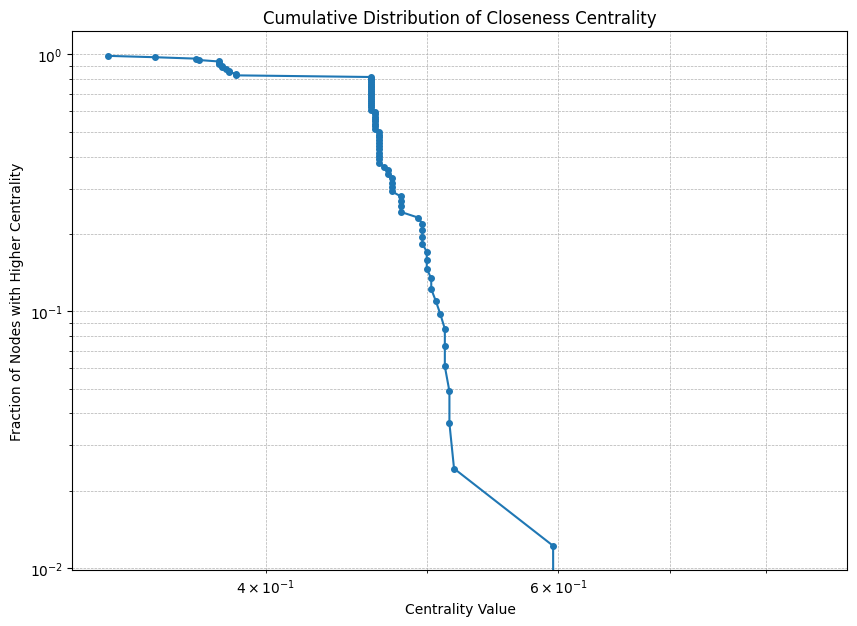

In [14]:
# Cumulative Distribution Visualization
import numpy as np
import matplotlib.pyplot as plt

def plot_cumulative_distribution(values, title):
    sorted_values = np.sort(list(values))
    yvals = np.arange(1, len(sorted_values) + 1) / float(len(sorted_values))
    
    plt.figure(figsize=(10, 7))
    plt.plot(sorted_values, 1 - yvals, marker='o', linestyle='-', markersize=4)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(title)
    plt.xlabel('Centrality Value')
    plt.ylabel('Fraction of Nodes with Higher Centrality')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

plot_cumulative_distribution(closeness_centrality_values.values(), 'Cumulative Distribution of Closeness Centrality')


# Explanation for the Function compute_closeness_centrality:
- This function calculates the closeness centrality for each node in the graph.
- It iterates over each node in the graph and computes the total distance to all other nodes using the shortest path length.
- The closeness centrality is then calculated using the formula num_nodes / total_distance, excluding the node itself.
- The resulting closeness centrality values are stored in a dictionary (closeness_centrality) and returned by the function.

In [15]:
def compute_closeness_centrality(graph):
    closeness_centrality = {}
    for node in graph.nodes():
        total_distance = sum(nx.shortest_path_length(graph, node, target) for target in graph.nodes() if target != node)
        num_nodes = len(graph.nodes()) - 1  # Excluding the node itself
        closeness_centrality[node] = num_nodes / total_distance if total_distance != 0 else 0
    return closeness_centrality
